In [156]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
dataframe = iris

In [4]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
feature = 'Sepal.Length'

In [6]:
def minimum(dataframe, feature, s):
    minimum = dataframe[dataframe['Species'] == s].reset_index(drop = True)[feature][0]
    for i in dataframe[dataframe['Species'] == s].reset_index(drop = True)[feature][1:]:
        if i < minimum:
            minimum = i
    return minimum
    

In [7]:
def maximum(dataframe, feature, s):
    maximum = dataframe[dataframe['Species'] == s].reset_index(drop = True)[feature][0]
    for i in dataframe[dataframe['Species'] == s].reset_index(drop = True)[feature][1:]:
        if i > maximum:
            maximum = i
    return maximum

In [8]:
maximum(iris, 'Sepal.Width', 'virginica')

3.8

In [9]:
minimum(iris, 'Sepal.Width', 'virginica')

2.2

In [10]:
def average(dataframe, feature, s):
    total = 0
    for i in dataframe[dataframe['Species'] == s].reset_index(drop = True)[feature]:
        total = total + i
    average_num = total/len(dataframe[dataframe['Species'] == s].reset_index(drop = True)[feature])
    return average_num

In [11]:
average(iris, 'Sepal.Width', 'virginica')

2.9739999999999998

In [12]:
percen_trim = 0.1
def trim_mean(dataframe, feature, percen_trim, s):
    new_df = dataframe[dataframe['Species'] == s].reset_index(drop = True)
    pos = int(len(dataframe[feature]) * percen_trim)
    df = dataframe[feature].sort_values()[pos:-pos]
    total = 0
    for i in df:
        total = total + i
    average_num = total/len(df)
    return average_num

In [13]:
trim_mean(dataframe, 'Sepal.Width', percen_trim, 'virginica')

3.0433333333333312

In [14]:
def standard_deviation(dataframe, feature, s):
    total = 0
    new_df = new_df = dataframe[dataframe['Species'] == s].reset_index(drop = True)
    for i in dataframe[dataframe['Species'] == s].reset_index(drop = True)[feature]:
        total = total + (i - average(dataframe, feature, s))**2
    total_n = total/len(new_df[feature])
    result = total_n ** (1/2)
    return result
    
    

In [15]:
standard_deviation(dataframe, 'Sepal.Width', 'virginica')

0.319255383666431

In [16]:
def skewness(dataframe, feature, s):
    total = 0
    new_df = new_df = dataframe[dataframe['Species'] == s].reset_index(drop = True)
    for i in dataframe[dataframe['Species'] == s].reset_index(drop = True)[feature]:
        total = total + (i - average(dataframe, feature, s)) ** 3
    result = (total /len(new_df[feature])) / (standard_deviation(dataframe, feature, s))**3
    return result

In [17]:
def kurtosis(dataframe, feature, s):
    total = 0
    new_df = new_df = dataframe[dataframe['Species'] == s].reset_index(drop = True)
    for i in dataframe[dataframe['Species'] == s].reset_index(drop = True)[feature]:
        total = total + (i - average(dataframe, feature, s)) ** 4
    result = (total /len(new_df[feature])) / (standard_deviation(dataframe, feature, s))**4
    return result

In [18]:
skewness(dataframe, feature, 'virginica')

0.11444474247297226

In [19]:
kurtosis(dataframe, 'Sepal.Width', 'virginica')

3.51976593549556

In [20]:
# Problem 2
# Use Reference from https://sebastianraschka.com/Articles/2014_python_lda.html

In [21]:
species_list = ['setosa', 'versicolor', 'virginica']

In [22]:
feature_list = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [23]:
# create a vector to store the average feature value for each class
final_vector = []
for s in species_list:
    mean_vectors = []
    for f in feature_list:
        mean_vectors.append(dataframe[dataframe['Species'] == s][f].mean())
    final_vector.append(mean_vectors)

In [24]:
output_vector = [np.array(x) for x in final_vector]

In [25]:
output_vector

[array([5.006, 3.428, 1.462, 0.246]),
 array([5.936, 2.77 , 4.26 , 1.326]),
 array([6.588, 2.974, 5.552, 2.026])]

In [26]:
# calculate the within-class scatter matrix
within_class_matrix = np.zeros((4, 4))
for s, i in zip(species_list, output_vector):
    class_matrix = np.zeros((4, 4))
    for row in dataframe[dataframe['Species'] == s][['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values:
        x_i = row.reshape(4,1)
        m_i = i.reshape(4, 1)
        class_matrix = class_matrix + (x_i - m_i).dot((x_i - m_i).T)
    within_class_matrix = within_class_matrix + class_matrix
    
    

In [28]:
# calculate the between-class scatter matrix
feature_mean = [dataframe[f].mean() for f in feature_list]

In [30]:
between_class_matrix = np.zeros((4, 4))
for i, s in zip(output_vector, species_list):
    m_i = i.reshape(4, 1)
    final_feature_mean = np.array(feature_mean).reshape(4, 1)
    between_class_matrix = between_class_matrix 
    + len(dataframe[dataframe['Species'] == s]) * (m_i - final_feature_mean).dot((m_i - final_feature_mean).T)


In [31]:
between_class_matrix

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [32]:
# gather the eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(within_class_matrix).dot(between_class_matrix))

In [33]:
eig_dict = dict(zip(eig_vals, eig_vecs))

In [34]:
# get the eigenvectors with the largest eigenvalues
eig_dict[max(eig_dict.keys())]

array([ 0.20874182, -0.00653196, -0.84301057, -0.406295  ])

In [35]:
key_list = sorted(eig_dict, reverse = True)[:2]

In [36]:
eig_matrix = np.hstack((eig_dict[key_list[0]].reshape(4, 1), eig_dict[key_list[1]].reshape(4, 1)))

In [37]:
data_val = dataframe[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values

In [38]:
data_lda = data_val.dot(eig_matrix)

In [302]:
# Problem 3

In [304]:
dataframe['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [339]:
Species = 'setosa'

In [340]:
def gather_cov_matrix_class(Species):
    cov_matrix_class 
    = dataframe[dataframe['Species'] == Species][['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].cov()
    cov_array_class = np.array(cov_matrix_class)
    return cov_array_class

In [342]:
cov_array_class = gather_cov_matrix_class(Species)

In [343]:
cov_array_class

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

In [344]:
average_list = []
for feature in feature_list:
        average_feature = np.mean(dataframe[dataframe['Species'] == Species][feature])
        std_feature = np.std(dataframe[dataframe['Species'] == Species][feature])
        average_list.append(average_feature)

In [345]:
average_array = np.array(average_list)

In [346]:
average_array

array([5.006, 3.428, 1.462, 0.246])

In [347]:
cov_array_class

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

In [348]:
new_array = np.random.multivariate_normal(average_array, cov_array_class, 100)

In [349]:
final_df = pd.DataFrame(new_array, columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])

In [350]:
max_dict 
= dataframe[dataframe['Species'] == Species][['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].max()

In [351]:
min_dict 
= dataframe[dataframe['Species'] == Species][['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].min()

In [352]:
new_df = pd.DataFrame()
for feature in feature_list:
    new_df = pd.concat([new_df, np.clip(final_df[feature], min_dict[feature], max_dict[feature])], axis = 1)

In [353]:
def graph_feature_synthetic(feature_1, feature_2, Species):
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.scatter(dataframe[dataframe['Species'] == Species][feature_1], dataframe[dataframe['Species'] == Species][feature_2], color = 'red')
    ax.scatter(new_df[feature_1], new_df[feature_2], color = 'blue')
    ax.set_title(feature_1 + ' vs ' + feature_2 + ' - Synthetic Data (blue) vs Iris Data (red) for ' + Species)
    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

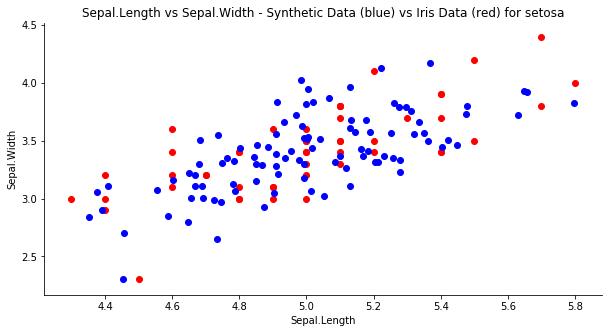

In [354]:
feature_1 = 'Sepal.Length'
feature_2 = 'Sepal.Width'
graph_feature_synthetic(feature_1, feature_2, Species)

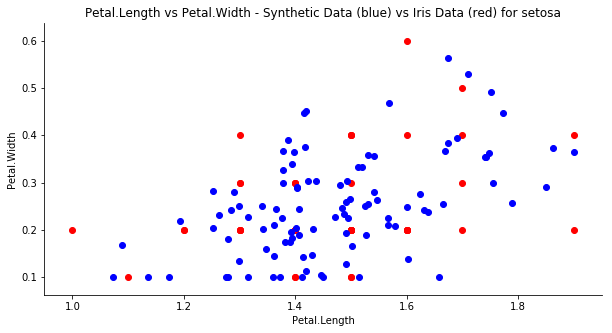

In [355]:
feature_1 = 'Petal.Length'
feature_2 = 'Petal.Width'
graph_feature_synthetic(feature_1, feature_2, Species)

In [137]:
dataframe['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [174]:
Species = 'setosa'
cov_matrix_class = dataframe[dataframe['Species'] == Species][['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].cov()

In [177]:
def gather_cov_matrix_class(Species):
    cov_matrix_class = dataframe[dataframe['Species'] == Species][['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].cov()
    cov_array_class = np.array(cov_matrix_class)
    return cov_array_class

In [184]:
gather_cov_matrix_class(Species)

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

In [ ]:
average_feature = np.mean(dataframe[dataframe['Species'] == 'setosa'][feature])

In [179]:
feature_list = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [180]:
fea_list = []
for s in species_list:
    for feature in feature_list:
        average_feature = np.mean(dataframe[dataframe['Species'] == s][feature])
        std_feature = np.std(dataframe[dataframe['Species'] == s][feature])
        stack_df = np.vstack(np.random.normal(average_feature, std_feature, (100, 1)))
        fea_list.append(stack_df)

In [182]:
setosa_stack = fea_list[0].reshape(100, 1)

for i in fea_list[1:4]:
    new_array = i.reshape(100, 1)
    setosa_stack = np.concatenate((setosa_stack, new_array), axis = 1)

In [146]:
fea_list = []
for s in species_list:
    for feature in feature_list:
        average_feature = np.mean(dataframe[dataframe['Species'] == s][feature])
        std_feature = np.std(dataframe[dataframe['Species'] == s][feature])
        print(s, feature, average_feature, std_feature)

setosa Sepal.Length 5.006 0.3489469873777391
setosa Sepal.Width 3.428 0.37525458025186054
setosa Petal.Length 1.4620000000000002 0.17191858538273283
setosa Petal.Width 0.24599999999999997 0.1043264108459598
versicolor Sepal.Length 5.936 0.5109833656783751
versicolor Sepal.Width 2.7700000000000005 0.31064449134018135
versicolor Petal.Length 4.26 0.4651881339845203
versicolor Petal.Width 1.3259999999999998 0.19576516544063705
virginica Sepal.Length 6.587999999999998 0.6294886813914926
virginica Sepal.Width 2.974 0.3192553836664309
virginica Petal.Length 5.5520000000000005 0.546347874526844
virginica Petal.Width 2.0260000000000002 0.2718896835115301


In [183]:
generated_array = setosa_stack.dot(cov_matrix_class)

In [ ]:
fea_list = []
for s in species_list:
    for feature in feature_list:
        average_feature = np.mean(dataframe[dataframe['Species'] == s][feature])
        stack_df = np.vstack(np.random.multivariate_normal(average_feature, std_feature, (100)))
        fea_list.append(stack_df)

In [172]:
final_df = pd.DataFrame(generated_array, columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])

In [173]:
final_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1.057901,1.117734,0.173023,0.102757
1,0.863740,0.870338,0.152900,0.085246
2,1.016088,1.044433,0.163492,0.097355
3,0.956690,0.972491,0.158712,0.090433
4,0.885750,0.881447,0.153964,0.084819
5,0.945689,0.960318,0.164137,0.090509
6,1.060098,1.082529,0.179663,0.100566
7,0.946054,0.973571,0.154197,0.089420
8,0.937658,0.969411,0.154940,0.088958
9,0.957878,0.992632,0.167878,0.093523


In [171]:
feature = 'Sepal.Length'
species = 'setosa'
minimum_val = dataframe[dataframe['Species'] == species][feature].min()
maximum_val = dataframe[dataframe['Species'] == species][feature].max()

In [166]:
scaler = MinMaxScaler()
scaler.fit(dataframe['Sepal.Length'].values.reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [167]:
scaler.transform(final_df['Sepal.Length'].values.reshape(-1, 1))

array([[-0.90058319],
       [-0.95451656],
       [-0.91219788],
       [-0.92869722],
       [-0.94840267],
       [-0.93175301],
       [-0.89997272],
       [-0.93165155],
       [-0.93398378],
       [-0.92836733],
       [-0.92125717],
       [-0.92073637],
       [-0.93392052],
       [-0.91351973],
       [-0.91078723],
       [-0.94556508],
       [-0.90649763],
       [-0.9090721 ],
       [-0.93277011],
       [-0.89557228],
       [-0.92343833],
       [-0.90698808],
       [-0.9380276 ],
       [-0.8938586 ],
       [-0.91060252],
       [-0.9025934 ],
       [-0.91625836],
       [-0.90234915],
       [-0.90780551],
       [-0.89995815],
       [-0.91006093],
       [-0.94034873],
       [-0.92270532],
       [-0.93637693],
       [-0.94316411],
       [-0.90744314],
       [-0.93386251],
       [-0.91316614],
       [-0.92661654],
       [-0.92453834],
       [-0.89834383],
       [-0.91728948],
       [-0.91193747],
       [-0.91735792],
       [-0.92459661],
       [-0

In [155]:
final_df['Sepal.Length'].mean()

0.9858969532163627

In [ ]:
# Problem 4

In [78]:
machine_learning = pd.read_csv('machine_learning.csv')

In [79]:
data_science = pd.read_csv('data_science.csv')

In [80]:
machine_learning

,Year,Number of Documents
0,2008,5705
1,2009,6027
2,2010,6465
3,2011,7054
4,2012,7818
5,2013,9094
6,2014,10907
7,2015,13297
8,2016,16514
9,2017,22091


In [87]:
subject = 'Machine Learning'
def subject_graph(subject, subject_name):
    df = pd.read_csv(subject_name + '.csv')
    fig, ax = plt.subplots(figsize = (10, 5))
    plt.plot(df['Year'], df['Number of Documents'])
    ax.set_title('Number of Documents Published by Year for ' + subject)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Documents')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


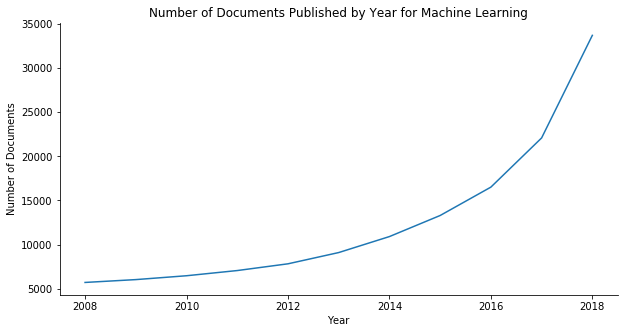

In [88]:
subject_graph('Machine Learning', 'machine_learning')

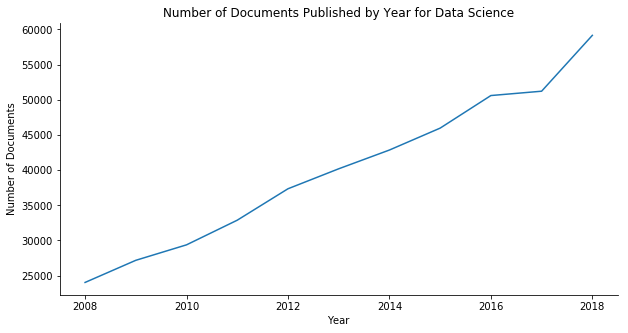

In [90]:
subject_graph('Data Science', 'data_science')